 # 統計的推定

In [1]:
# %
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import unittest
import doctest
from matplotlib import rcParams
import os
import warnings
warnings.simplefilter('ignore', FutureWarning)
path = os.path.dirname(os.path.abspath(__file__))

 ## 統計的推測の考え方

 ### サンプリング

 ### 単純ランダムサンプリング

 ### 湖と釣りの例

 ### 標本と確率変数

 ### 標本が得られるプロセスとしての母集団分析

 ### 母集団分からの標本抽出の言い換え

 ### モデルの利用

 ### 壺のモデル

 ### 標本が得られるプロセスの抽象化としてのモデル

 ### 母集団分布と母集団の相対度数分布

 ### もう少し現実的な、湖と釣りの例

 ### 仮定を置くということ

 ### 母集団分布に正規分布を仮定する

 ### 確率分布のパラメータ（母数）

 ### パラメトリックなモデル・ノンパラメトリックなモデル

 ### 統計的推定

 ### 母集団分布に正規分布を仮定した場合の手続き

 ### まとめ：統計的推測の考え方

 ### 次章からの開設の流れ

 ### 仮定を置くｎということの是非

 ## 母集団からの標本平均シミュレーション

 ### 分析の準備

 ### データが得られるプロセス

 ### 5尾の魚しかいない湖からの標本抽出

In [2]:
fish_5 = np.array([2, 3, 4, 5, 6])
fish_5

# 乱数の種
np.random.seed(1)

# 標本抽出
sample_1 = np.random.choice(fish_5, size=3, replace=False)
sample_1
round(np.mean(sample_1), 3)

4.333

 ### もっとたくさんの魚がいる湖からの標本抽出

 #### データの読み込み

In [3]:
fish_100000 = pd.read_csv(
    path + '/data/5-2-1-fish_length_100000.csv')['length']
# 先頭行の取得
fish_100000.head(3)

0    5.297442
1    3.505566
2    3.572546
Name: length, dtype: float64

 #### 標本抽出

<Axes: ylabel='Count'>

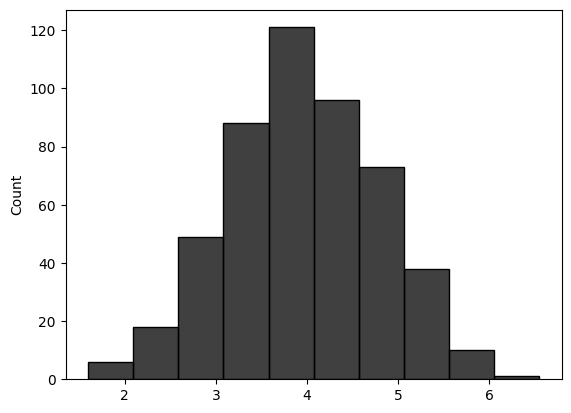

In [4]:
# 乱数の種
np.random.seed(2)
# 標本抽出
sample_2 = np.random.choice(fish_100000, size=500, replace=False)
round(np.mean(sample_2), 3)
sns.histplot(sample_2, bins=10, color='black')

 ### 母集団分布の可視化

平均    : 4.0
分散    : 0.64
標準偏差: 0.8


<Axes: xlabel='length', ylabel='Count'>

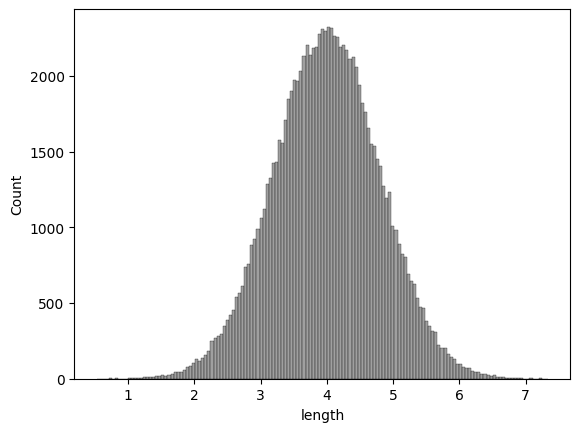

In [5]:
print('平均    :', round(np.mean(fish_100000), 3))
print('分散    :', round(np.var(fish_100000), 3))
print('標準偏差:', round(np.std(fish_100000), 3))

sns.histplot(fish_100000, color='gray')

 ### 母集団分布と正規分布の確率密度関数

     x   density
0  1.0  0.000441
1  1.1  0.000699
2  1.2  0.001091


<Axes: xlabel='length', ylabel='Density'>

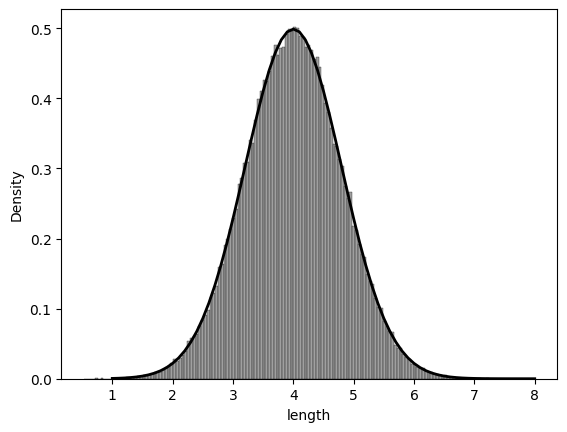

In [6]:
# 確率変数
x = np.arange(start=1, stop=8.1, step=0.1)
# 確率密度
density = stats.norm.pdf(x=x, loc=4, scale=0.8)

# データフレームにまとめる
density_df = pd.DataFrame({'x': x, 'density': density})

# 先頭行の取得
print(density_df.head(3))

# 母集団のヒストグラム
sns.histplot(fish_100000, stat='density', color='gray')
# 折れ線グラフ（正規分布の確率密度関数）
sns.lineplot(x=x, y=density, data=density_df, color='black', linewidth=2.0)

 ### データが得られるプロセスの抽象化

In [7]:
# 乱数の種
np.random.seed(1)
# 正規分布に従う乱数の生成
sample_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sample_norm
round(np.mean(sample_norm), 3)

3.922

 ### 議論の補足

 ### 母集団分布を正規分布とみなして良いのか

 ## 母平均の推定

 ### 分析の準備

 ### 母平均・母分散・母標準偏差

 ### シミュレーションの概要

 ### 母集団の用意

In [8]:
population = stats.norm(loc=4, scale=0.8)

 ### 標本平均を計算する

In [9]:
np.random.seed(2)
sample = population.rvs(size=10)
sample
round(np.mean(sample), 3)

3.495

 ### 標本平均を何度も計算する

In [10]:
sample_mean_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample_loop)

sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

 ### 標本平均の平均値

In [11]:
round(np.mean(sample_mean_array), 3)

4.004

 ### 不偏性・不偏推定量

 ### 母平均の不偏推定量としての標本平均

 ### 標本平均を何度も計算する関数を作る

In [12]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample_loop = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample_loop)
    return (sample_mean_array)


np.random.seed(1)
round(np.mean(calc_sample_mean(size=10, n_trial=10000)), 3)

4.004

 ### サンプルサイズ別の、標本平均の分布

   sample_mean sample_size
0     3.922287     size 10
1     3.864329     size 10
2     4.069530     size 10
            sample_mean       
                    std   mean
sample_size                   
size 10           0.251  4.004
size 20           0.180  4.001
size 30           0.146  4.001


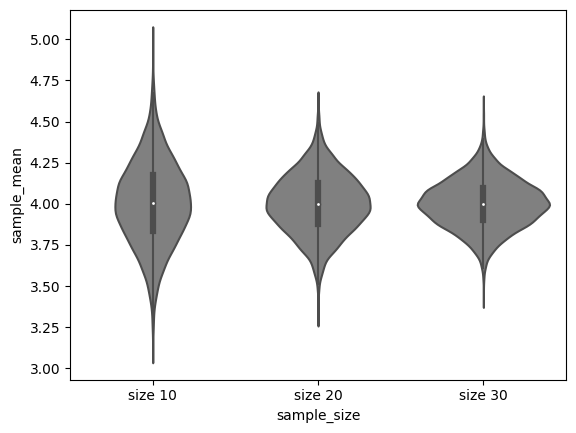

In [13]:
np.random.seed(1)
# サンプルサイズ10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean': size_10,
    'sample_size': np.tile('size 10', 10000)
})
# サンプルサイズ20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean': size_20,
    'sample_size': np.tile('size 20', 10000)
})
# サンプルサイズ30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean': size_30,
    'sample_size': np.tile('size 30', 10000)
})
# 結合
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])
# 結果の表示
print(sim_result.head(3))

sns.violinplot(x='sample_size', y='sample_mean', data=sim_result, color='gray')

group = sim_result.groupby('sample_size')
print(group.agg([np.std, np.mean]).round(3))

 ### 標本平均の標準偏差の計算

 ### 標準誤差

 ### サンプルサイズを大きくしたときの標本平均

   sample_size  sample_mean
0           10     3.922287
1          110     4.038361
2          210     4.091853


<Axes: xlabel='sample_size', ylabel='sample_mean'>

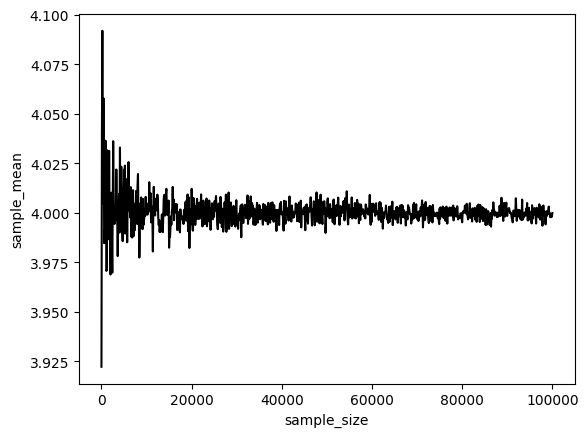

In [14]:
size_array = np.arange(start=10, stop=100100, step=100)
size_array
sample_mean_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_loop = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample_loop)
size_mean_df = pd.DataFrame({
    'sample_size': size_array,
    'sample_mean': sample_mean_array_size,
})
print(size_mean_df.head(3))
sns.lineplot(x='sample_size', y='sample_mean',
             data=size_mean_df, color='black')

 ### 一致制・一致推定量

 ### 大数の法則

 ### 推測統計学の考え方

 ## 母分散の推定

 ### 分析の準備

 ### 母分散の用意

In [15]:
population = stats.norm(loc=4, scale=0.8)

 ### 母分散の推定量としての標本分散・不偏分散

 ### 標本分散と不偏分散を計算する

In [16]:
np.random.seed(2)
sample = population.rvs(size=10)
sample
print('標本分散:', round(np.var(sample, ddof=0), 3))
print('不偏分散:', round(np.var(sample, ddof=1), 3))

標本分散: 0.712
不偏分散: 0.791


 ### 標本分散の平均値

In [17]:
sample_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)

round(np.mean(sample_var_array), 3)

0.575

 ### 不偏分散の平均値

In [18]:
# 「不偏分散」を格納する入れ物
unbias_var_array = np.zeros(10000)
# 「データを10個選んで不偏分散を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)
# ｎ不偏分散をの平均値
round(np.mean(unbias_var_array), 3)

0.639

 ### 母分散の不偏推定量としての不偏分散

 ### サンプルサイズを大きくしたときの不偏分散

   sample_size  unbias_var
0           10    1.008526
1          110    0.460805
2          210    0.631723


<Axes: xlabel='sample_size', ylabel='unbias_var'>

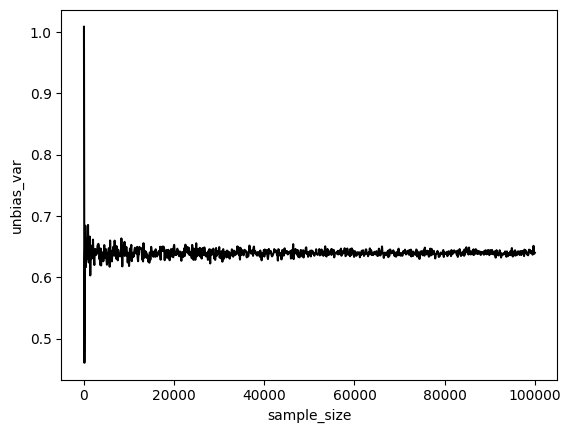

In [19]:
size_array = np.arange(start=10, stop=100100, step=100)
size_array

unbias_var_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)

size_var_df = pd.DataFrame({
    'sample_size': size_array,
    'unbias_var': unbias_var_array_size,
})

print(size_var_df.head(3))

sns.lineplot(x='sample_size', y='unbias_var',
             data=size_var_df, color='black')

 ## 正規母集団から派生した確率分布

 ### 分析の準備

 ### 標本分布

 ### 正規分布の活用

 ### χ２分布

 ### シミュレーションの準備

In [20]:
mu = 4
sigma = 0.8
population = stats.norm(loc=mu, scale=sigma)

# サンプルサイズ
n = 5
# 標本抽出
np.random.seed(1)
sample = population.rvs(size=n)
sample

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ])

 ### χ２分布

 #### Pythonにおける扱い

In [21]:
round(stats.chi2.pdf(x=2, df=n-1), 3)
round(stats.chi2.cdf(x=2, df=n-1), 3)
round(stats.chi2.ppf(q=0.5, df=n-1), 3)

3.357

 #### シミュレーション

     x  chi2_distribution
0  0.0           0.000000
1  0.1           0.023781
2  0.2           0.045242


<Axes: ylabel='Density'>

/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


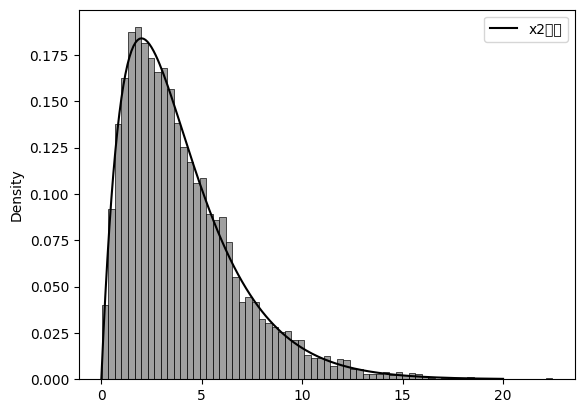

In [22]:
# サンプルサイズ
n = 5
# 乱数の種
np.random.seed(1)
# x2値を格納する入れ物
chi2_value_array = np.zeros(10000)
# シミュレーションの実行
for i in range(0, 10000):
    sample = population.rvs(size=n)
    u2 = np.var(sample, ddof=1)  # 不偏分散
    chi2 = (n - 1) * u2 / sigma**2  # χ２値
    chi2_value_array[i] = chi2

# 確率変数
x = np.arange(start=0, stop=20.1, step=0.1)
# x2分布の確率密度
chi2_distribution = stats.chi2.pdf(x=x, df=n-1)
# データフレームにまとめる
chi2_df = pd.DataFrame({
    'x': x,
    'chi2_distribution': chi2_distribution
})
print(chi2_df.head(3))

# ヒストグラム
sns.histplot(chi2_value_array, color='gray', stat='density')
# x2分布
sns.lineplot(x=x, y=chi2_distribution,
             data=chi2_df, color='black',
             label='x2分布')

 ### 標本平均が従う確率分布

 ### 標本平均の標準化

     x  z_distribution
0 -6.0    6.075883e-09
1 -5.9    1.101576e-08
2 -5.8    1.977320e-08
     x  z_distribution
0 -6.0    6.075883e-09
1 -5.9    1.101576e-08
2 -5.8    1.977320e-08


(-6.0, 6.0)

/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 35215 (\N{CJK UNIFIED IDEOGRAPH-898F}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPytho

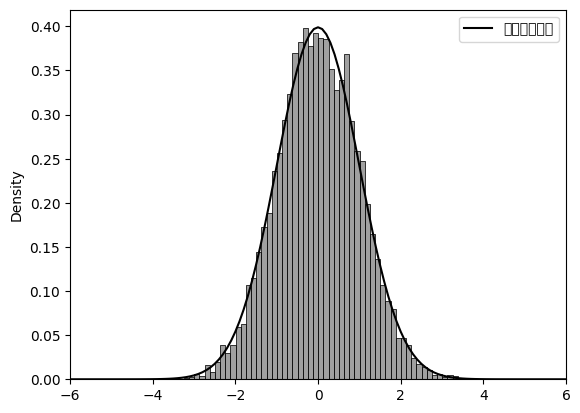

In [23]:
# サンプルサイズ
n = 3
# 乱数の種
np.random.seed(1)
# z値を格納する入れ物
z_value_array = np.zeros(10000)
# シミュレーションの実行
for i in range(0, 10000):
    sample = population.rvs(size=n)
    x_bar = np.mean(sample)  # 標本平均
    bar_sigma = sigma / np.sqrt(n)  # 標本平均の標準誤差
    z_value_array[i] = (x_bar - mu) / bar_sigma  # z値

# 確率変数
x = np.arange(start=-6, stop=6.1, step=0.1)
# 標準正規分布の確率密度
z_distribution = stats.norm.pdf(x=x, loc=0, scale=1)
# データフレームにまとめる
z_df = pd.DataFrame({
    'x': x,
    'z_distribution': z_distribution
})
print(z_df.head(3))
# 確率変数
x = np.arange(start=-6, stop=6.1, step=0.1)
# 標準正規分布の確率密度
z_distribution = stats.norm.pdf(x=x, loc=0, scale=1)
# データフレームにまとめる
z_df = pd.DataFrame({
    'x': x,
    'z_distribution': z_distribution
})
print(z_df.head(3))

# z値ヒストグラム
sns.histplot(z_value_array, color='gray', stat='density')
# 標準正規分布
sns.lineplot(x=x, y=z_distribution,
             data=z_df, color='black',
             label='標準正規分布')
# X軸の範囲
plt.xlim([-6, 6])

 ### t値
 $$
 t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}

 ### t分布

 #### Pythonにおける扱い

 #### シミュレーション

     x  t_distribution
0 -6.0        0.004269
1 -5.9        0.004478
2 -5.8        0.004700


(-6.0, 6.0)

/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPytho

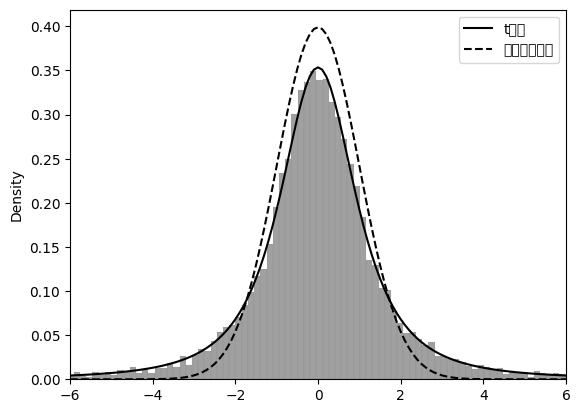

In [24]:
# 乱数の種
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)
# シミュレーションの実行
for i in range(0, 10000):
    sample = population.rvs(size=n)
    x_bar = np.mean(sample)  # 標本平均
    u = np.std(sample, ddof=1)  # 標本標準偏差
    se = u/np.sqrt(n)  # 標準誤差
    t_value_array[i] = (x_bar - mu) / se  # t値
# t分布の確率密度
t_distribution = stats.t.pdf(x=x, df=n-1)
# データフレームにまとめる
t_df = pd.DataFrame({
    'x': x,
    't_distribution': t_distribution
})
print(t_df.head(3))

# t値のヒストグラム
sns.histplot(t_value_array, color='gray', stat='density')
# t分布
sns.lineplot(x=x, y=t_distribution,
             data=t_df, color='black',
             label='t分布')
# 標準正規分布
sns.lineplot(x=x, y=z_distribution,
             data=z_df, color='black',
             linestyle='dashed',
             label='標準正規分布')
# X軸の範囲
plt.xlim([-6, 6])

 ### F分布

 #### F分布の定義
 $$
 F=\frac{\frac{s_1^2}{\sigma_1^2}}{\frac{s_2^2}{\sigma_2^2}}

 ### F分布

 #### Pythonにおける扱い

 #### シミュレーション

     x  f_distribution
0  0.0        0.000000
1  0.1        0.368515
2  0.2        0.562143


(0.0, 6.0)

/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/projects/k2wroks/programing_introduce_2023/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


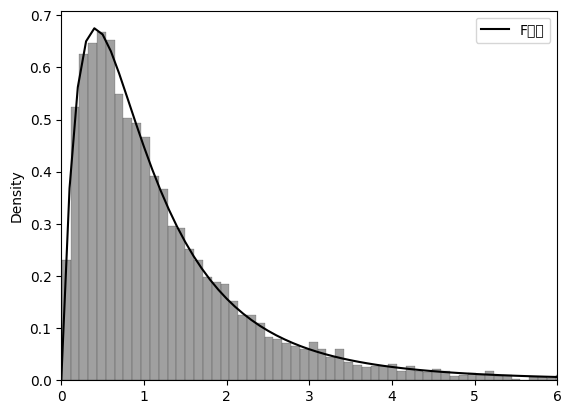

In [25]:
# サンプルサイズ
m = 5
n = 10
# 乱数の種
np.random.seed(1)
# F値を格納する入れ物
f_value_array = np.zeros(10000)
# シミュレーションの実行
for i in range(0, 10000):
    sample_x = population.rvs(size=m)
    sample_y = population.rvs(size=n)
    u2_x = np.var(sample_x, ddof=1)  # 不偏分散
    u2_y = np.var(sample_y, ddof=1)  # 不偏分散
    f_value_array[i] = u2_x / u2_y  # F値
# 確率変数
x = np.arange(start=0, stop=6.1, step=0.1)
# F分布の確率密度
f_distribution = stats.f.pdf(x=x, dfn=m-1, dfd=n-1)
# データフレームにまとめる
f_df = pd.DataFrame({
    'x': x,
    'f_distribution': f_distribution
})
print(f_df.head(3))

# F値のヒストグラム
sns.histplot(f_value_array, color='gray', stat='density')
# F分布
sns.lineplot(x=x, y=f_distribution,
             data=f_df, color='black',
             label='F分布')
# X軸の範囲
plt.xlim([0, 6])

 ## 区間推定

 ### 分析の準備

In [26]:
fish = pd.read_csv(path + '/data/5-6-1-fish_length.csv')['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

 ### 点推定・区間推定

 ### 点推定

In [27]:
x_bar = np.mean(fish)
u2 = np.var(fish, ddof=1)

print('標本平均:', round(x_bar, 3))
print('不偏分散:', round(u2, 3))

標本平均: 4.187
不偏分散: 0.68


 ### 信頼係数・信頼区間

 ### 信頼限界
 $$
 \bar{x}-t_{\alpha/2}\frac{s}{\sqrt{n}}\leq\mu\leq\bar{x}+t_{\alpha/2}\frac{s}{\sqrt{n}}

 ### 母平均の区間推定

 #### 定義通りの実装

In [28]:
# 統計量の計算
n = len(fish)  # サンプルサイズ
df = n - 1     # 自由度
u = np.std(fish, ddof=1)  # 標準偏差
se = u / np.sqrt(n)  # 標準誤差

print('サンプルサイズ:', n)
print('自由度:', df)
print('標準偏差:', round(u, 3))
print('標準誤差:', round(se, 3))
print('標準平均:', round(x_bar, 3))

# 2.5%点と97.5%点
t_025 = stats.t.ppf(q=0.025, df=df)
t_975 = stats.t.ppf(q=0.975, df=df)

print('t分布の2.5%点:', round(t_025, 3))
print('t分布の97.5%点:', round(t_975, 3))

# 母平均の区間推定
lower_mu = x_bar - t_975 * se
upper_mu = x_bar - t_025 * se

print('下側信頼限界:', round(lower_mu, 3))
print('上側信頼限界:', round(upper_mu, 3))

サンプルサイズ: 10
自由度: 9
標準偏差: 0.825
標準誤差: 0.261
標準平均: 4.187
t分布の2.5%点: -2.262
t分布の97.5%点: 2.262
下側信頼限界: 3.597
上側信頼限界: 4.777


 #### 効率的な実装

In [29]:
res_1 = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se)
np.round(res_1, 3)

<ipython-input-29-006123f80732>:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  res_1 = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se)


array([3.597, 4.777])

 ### 信頼区間の幅を決める要素

In [30]:
se_2 = (u * 10) / np.sqrt(n)
res_2 = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se_2)
np.round(res_2, 3)

n_2 = n * 10
df_2 = n_2 - 1
se_3 = u / np.sqrt(n_2)
res_3 = stats.t.interval(alpha=0.95, df=df_2, loc=x_bar, scale=se_3)
np.round(res_3, 3)

res_4 = stats.t.interval(alpha=0.99, df=df, loc=x_bar, scale=se)
np.round(res_4, 3)

<ipython-input-30-213f5955943e>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  res_2 = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se_2)
<ipython-input-30-213f5955943e>:9: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  res_3 = stats.t.interval(alpha=0.95, df=df_2, loc=x_bar, scale=se_3)
<ipython-input-30-213f5955943e>:12: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  res_4 = stats.t.interval(alpha=0.99, df=df, loc=x_bar, scale=se)


array([3.339, 5.035])

 ### 区間推定の結果の解釈

In [31]:
norm_dist = stats.norm(loc=4, scale=0.8)
num_trials = 20000  # シミュレーションの繰り返し数
included_num = 0  # 信頼区間が母平均(4)を含んでいた回数

# 「データを10個選んで95%信頼区間を求める」試行を20000回繰り返す
np.random.seed(1)  # 乱数の種
for i in range(0, num_trials):
    # 標本の抽出
    sample = norm_dist.rvs(size=10)
    # 信頼区間の計算
    df = len(sample) - 1  # 自由度
    x_bar = np.mean(sample)  # 標本平均
    u = np.std(sample, ddof=1)  # 標準偏差
    se = u / np.sqrt(len(sample))  # 標準誤差
    interval = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se)
    # 信頼区間が母平均(4)を含んでいた回数をカウント
    if (interval[0] <= 4 <= interval[1]):
        included_num += 1

included_num / num_trials

<ipython-input-31-7bb5a636a59c>:16: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = stats.t.interval(alpha=0.95, df=df, loc=x_bar, scale=se)


 ### 母分散の区間推定
 $$
 \frac{(n-1)s^2}{\chi_{\alpha/2}^2}\leq\sigma^2\leq\frac{(n-1)s^2}{\chi_{1-\alpha/2}^2}

 ### 母平均の区間推定

In [ ]:
# 2.5%点と97.5%点
chi_025 = stats.chi2.ppf(q=0.025, df=df)
chi_975 = stats.chi2.ppf(q=0.975, df=df)

print('χ2分布の2.5%点:', round(chi_025, 3))
print('χ2分布の97.5%点:', round(chi_975, 3))

# 母分散の区間推定
upper_sigma = (n - 1) * u2 / chi_025
lower_sigma = (n - 1) * u2 / chi_975

print('下側信頼限界:', round(lower_sigma, 3))
print('上側信頼限界:', round(upper_sigma, 3))